<a href="https://colab.research.google.com/github/Gakori/Ebola-cases/blob/master/Ebola_West_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) RESEARCH QUESTION

Ebola is an outbreak that occured in west Africa and spread to other countries in west africa. Investigate the effects of the outbreak to the population considering the number of deaths and the number of affected people in different countries.

### Hypothesis 1


### Metric for success
investigated the numbers of affected people and deaths in West Africa

### Understanding the context

### recording experimantal design

i) Business understanding

ii) Loading the data

iii) Data cleaning

iv) EDA

V) Hypothesis testing

vi) Conclusion

vii)Recommendations

### 2) Loading the data

In [84]:
#import all the neccesary libraries
#pandas and numpy
import pandas as pd
import numpy as np

#for viz
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [4]:
#loading the datasets
df = pd.read_csv('ebola_data_db_format.csv')
df.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


In [5]:
df.shape

(17585, 4)

*contains 17585 rows and 4 columns*

In [6]:
ebola_df = pd.read_csv('ebola_2014_2016_clean.csv')
ebola_df.head()

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


In [7]:
ebola_df.shape

(2485, 4)

*the data contains 2485 rows and 4 columns*

In [8]:
#checking for the info of the data
ebola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     2485 non-null   object 
 1   Date                                                        2485 non-null   object 
 2   Cumulative no. of confirmed, probable and suspected cases   2477 non-null   float64
 3   Cumulative no. of confirmed, probable and suspected deaths  2485 non-null   float64
dtypes: float64(2), object(2)
memory usage: 77.8+ KB


*number of cases some null values*

In [9]:
#checking for datatypes
ebola_df.dtypes

Country                                                        object
Date                                                           object
Cumulative no. of confirmed, probable and suspected cases     float64
Cumulative no. of confirmed, probable and suspected deaths    float64
dtype: object

*country and date are objects while cases and deaths are floats*

*date should be in datetime format while country should be categorical*

In [10]:
#checking for the columns in the dataset
ebola_df.columns

Index(['Country', 'Date',
       'Cumulative no. of confirmed, probable and suspected cases',
       'Cumulative no. of confirmed, probable and suspected deaths'],
      dtype='object')

In [11]:
#checking for the size of our data
ebola_df.size

9940

*the size of the dataset is 9940*

In [12]:
#checing for stat summaries
ebola_df.describe()

,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
count,2477.000000,2485.000000
mean,2553.678644,1028.347686
std,4427.118148,1656.064372
min,0.000000,0.000000
25%,1.000000,0.000000
50%,8.000000,6.000000
75%,3657.000000,2386.000000
max,14122.000000,4806.000000


*from the above summary, there were 2477 confirmed cases and 2485 deaths*

*the mean of cases and deaths was 2553.68 and 1028.35 respectively*


In [13]:
#checking for value count in country column
ebola_df['Country'].value_counts()

Liberia                     365
Guinea                      259
Sierra Leone                259
Nigeria                     255
Senegal                     254
United States of America    245
Mali                        243
Spain                       243
United Kingdom              221
Italy                       141
Name: Country, dtype: int64

*apart from countries in west africa there were other countries which are USA, UK and Italy*

*Liberia has the most count while italy has the lowest*

In [14]:
#checking for value count in date column
ebola_df['Date'].value_counts()

2016-03-23    12
2015-09-07    11
2015-10-16    11
2015-09-18    11
2015-07-15    11
              ..
2014-09-24     5
2014-09-18     5
2014-09-05     5
2014-10-01     5
2014-08-29     4
Name: Date, Length: 259, dtype: int64

*2016-03-23 has the most value count*

### 3) Tyding the data

In [15]:
#renaming columns 

ebola_df.rename({'Cumulative no. of confirmed, probable and suspected cases' : 'no of confirmed cases', 
                 'Cumulative no. of confirmed, probable and suspected deaths' : 'no of confirmed deaths'}, 
                    axis=1, inplace=True)

ebola_df.columns

Index(['Country', 'Date', 'no of confirmed cases', 'no of confirmed deaths'], dtype='object')

*renamed no of cases and deaths*

In [16]:
#changing date to datetime
ebola_df.Date = pd.to_datetime(ebola_df.Date)
ebola_df.Date

0      2014-08-29
1      2014-08-29
2      2014-08-29
3      2014-08-29
4      2014-09-05
          ...    
2480   2016-03-23
2481   2016-03-23
2482   2016-03-23
2483   2016-03-23
2484   2016-03-23
Name: Date, Length: 2485, dtype: datetime64[ns]

In [17]:
#country to category

ebola_df['Country']= ebola_df['Country'].astype('category')

#reviewing the dtypes
ebola_df.dtypes

Country                         category
Date                      datetime64[ns]
no of confirmed cases            float64
no of confirmed deaths           float64
dtype: object

*all columns are in the correct format*

In [18]:
#checking for null values
ebola_df.isnull().values.sum()

8

In [19]:
ebola_df.isnull().sum()
ebola_df.dropna(subset=['no of confirmed cases'], inplace=True)

Country                   0
Date                      0
no of confirmed cases     8
no of confirmed deaths    0
dtype: int64

### 4) Univariate Analysis

**Mode**

frequenty occuring number found in a set of numbers

In [21]:
#finding the mode of no of cases and deaths
#for loop is used 

for column in ebola_df.columns:
  print(f'mode of {column: <22} : {ebola_df[column].mode()[0]}')


mode of Country                : Liberia
mode of Date                   : 2016-03-23 00:00:00
mode of no of confirmed cases  : 1.0
mode of no of confirmed deaths : 0.0


*Liberia has been spotted several times, the date 2016-03-23 is frequently occuring, most cases are at 1 and zero deaths*

**MEAN**

*mean is detrmined by adding all the data points of a population and divding it by the number of data points*

In [22]:
#fing the mean of numerical columns using a for loop
#pandas columns.diff is used to select only numerical columns
numerical_col = ebola_df[ebola_df.columns.difference(['Country', 'Date'])]
numerical_col

for column in numerical_col:
  print(f'mean of {column: <22} : {ebola_df[column].mean()}')

mean of no of confirmed cases  : 2553.6786435203876
mean of no of confirmed deaths : 1028.3476861167003


*mean of confirmed cases is 2553.68 while the mean of deaths is 1028.35*

*mean of confirmed cases is more than the deaths*

**MEDIAN**

its a value in which datais divided into two equal partsie the no on the right side is the same as the no on the left side provided the data is arranged in ascending or descending order

In [23]:
#finding the median using for loop 

for column in numerical_col:
  print(f'median of {column: <22} : {ebola_df[column].median()}')

median of no of confirmed cases  : 8.0
median of no of confirmed deaths : 6.0


*the median of cases is 8.0 while that of deaths is 6.0*

**Standard Deviation**

is a measurement of avg distance between each quantity and the mean.It tries to show how data is spread out from the mean.
A low std indicates that the data points tend to be close to the mean of the dataset while a high std indicates that the data points are spread out over a wider range of values.

In [24]:
#std using a for loop 

for column in numerical_col:
  print(f'standard deviation of {column: <22} : {ebola_df[column].std()}')

standard deviation of no of confirmed cases  : 4427.118148257047
standard deviation of no of confirmed deaths : 1656.0643715560198


*median of confirmed cases is 4427.12 while that of deatths is 1659.06*

**Variance**

is the square of the avg distance btwn the mean and each datapoint.simply, it is the square of the std. how spreadout the datapoints are.

In [25]:
#var using for loop

for column in numerical_col:
  print(f'variance of {column: <22} : {ebola_df[column].var()}')

variance of no of confirmed cases  : 19599375.098626908
variance of no of confirmed deaths : 2742549.2027372345


*variance of cases is 19599375.10 while that of deaths is 2742599.20*

**Range**

this is the difference bettween the maximum and the minimum values

In [26]:
#a function is created to find the range

def calculating_range(column):
  maximum=ebola_df[column].max()
  minimum=ebola_df[column].min()
  column_range=maximum-minimum
  return column_range

for column in numerical_col:
  print(f'Range for {column: <22} : {calculating_range(column)}')

Range for no of confirmed cases  : 14122.0
Range for no of confirmed deaths : 4806.0


**Inter Quartile Range**

values that divide data into quarters provided the data is sort in ascending order.ie Q1(0.25), Q2(0.50), Q3(0.75) 

In [27]:
#for loop to calculate each quartile

for column in numerical_col:
  print(f'Quartiles for {column: <22} : Q1 - {list(ebola_df[column].quantile([0.25]))[0]: <7}\
  Q2 - {list(ebola_df[column].quantile([0.5]))[0]: <7}\
  Q3 - {list(ebola_df[column].quantile([0.75]))[0]}')

Quartiles for no of confirmed cases  : Q1 - 1.0      Q2 - 8.0      Q3 - 3657.0
Quartiles for no of confirmed deaths : Q1 - 0.0      Q2 - 6.0      Q3 - 2386.0


**Skewness**

 Is the measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
Its value can either be positive, negative or undefined. In a perfect normal dist, the tails on either side of the curve are axact mirrors images of each other.

When a distribution is skewed to the left, the tail on the curves left-hand side is longer than the one on the right, and the mean is less than the mode.This is called negative skewness.

When a dist is skewed to the right, the tail on the left-hand side, and the mean is greater than the mode.This is positive skewness.

In [28]:
#calculatng skewness using for loop

for column in numerical_col:
  print(f'Skewness of {column: <22} : {ebola_df[column].skew()}')

Skewness of no of confirmed cases  : 1.4921464696008508
Skewness of no of confirmed deaths : 1.2195432668301713


*both cases and deaths are positively skewed meaning that the mean is greater than the mode*

**Kurtosis**

kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Kurtosis can also be defined as a measure of whether the data points are heavy-tailed (profusion of outliers) or light-tailed (lack of outliers) relative to a normal distribution. There are three types of Kurtosis: Mesokurtic, Leptokurtic and Platykurtic.

Mesokurtic is the distribution which has similar kurtosis as normal distribution kurtosis, which is zero.

Leptokurtic is the distribution which has kurtosis greater than a Mesokurtic distribution. Tails of such distributions are thick and heavy.

Platykurtic is the distribution which has kurtosis lesser than a Mesokurtic distribution. Tails of such distributions thinner.

If the kurtosis is close to 0, then a normal distribution is often assumed. These are called mesokurtic distributions.

If the kurtosis is less than zero, then the distribution is light tails and is called a platykurtic distribution.

If the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution.

In [29]:
#calculating kurtosis using for loop

for column in numerical_col:
  print(f'kurtosis for {column: <22} : {ebola_df[column].kurt()}')

kurtosis for no of confirmed cases  : 0.6267310821315686
kurtosis for no of confirmed deaths : -0.15309252675478557


*in cases column, the kurt is 0.63 meaning its a mesokurtic distribution, we therefore we assume it forms a normal dist*

*in deaths column, the kurts is -0.15 meaning its a platykururtic dist and its tail is light tail*

**HISTOGRAM**

used to test whether the data is normally distributed
the test consists of looking at the histogram and discerning whether it approximates the bell shaped of a normal dist.

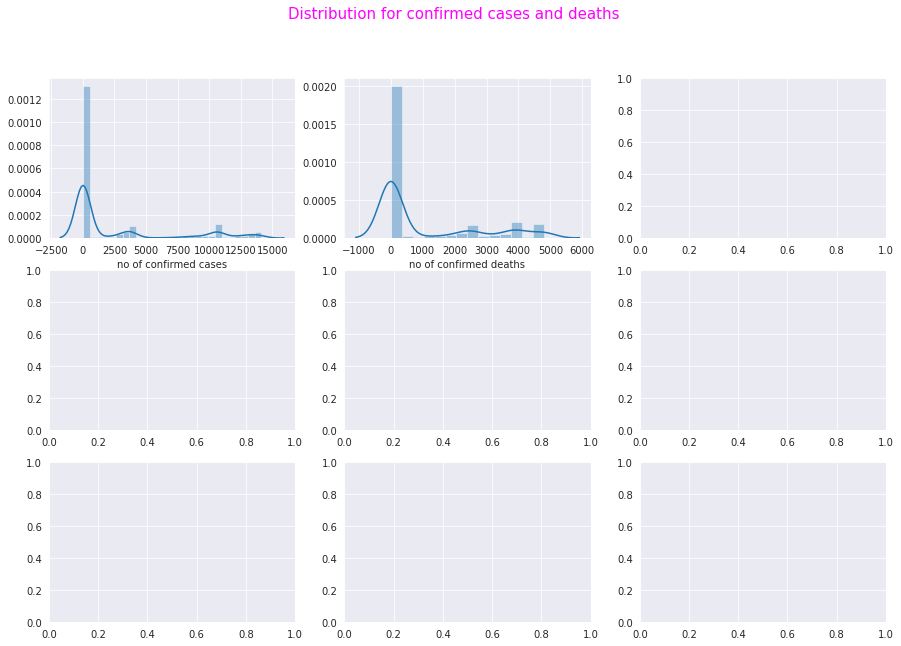

In [ ]:
#the hist are plotted used hist
#for loop used  to plot each numerical column
#seaborn plotting style has been set to dark grid for visibility

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.suptitle('Distribution for confirmed cases and deaths', color='magenta', fontsize=15)

for ax, data, name in zip(axes.flatten(), ebola_df, numerical_col):
  sns.distplot(ebola_df[name], ax = ax)

**Boxplot**

its a standerdized way of displaying the distribution of data based on a five number summary i.e (minimum, first quartile Q1, median, third quartile Q3 and maximum)
it shows outliers and what values they are
it can aslo tell if the data is symmetrical i.e how tightly the data is grouped, and how the data is skewed.

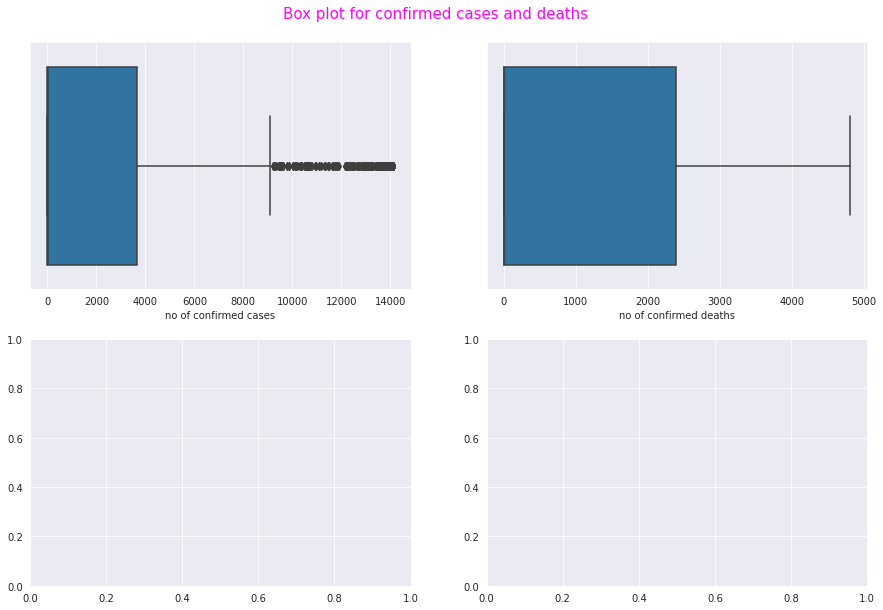

In [30]:
#plotting boxplot for each boxplot

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Box plot for confirmed cases and deaths', y=0.93, color='magenta', fontsize=15)

for ax, data, name in zip(axes.flatten(), ebola_df, numerical_col):
  sns.boxplot(ebola_df[name], ax=ax)

*from the boxplots above no of confirmed cases has outliers while deaths has no outliers*

In [ ]:
#checking for outliers using IQR

ebola_df1=numerical_col  #creating df for only numerical col
Q1 = ebola_df1.quantile(0.25)         #calculating the first quantile
Q3 = ebola_df1.quantile(0.75)         #calculating the third quantile

IQR = Q3 -Q1      #difference between the two quantiles

# Previweing the first five columns which contain outliers
#
((ebola_df1 < Q1 - 1.5 * IQR) | (ebola_df1 > Q3 + 1.5 * IQR))

#checking how many outliers in the dataset
len(ebola_df1[((ebola_df1 < Q1 - 1.5 * IQR) | (ebola_df1 > Q3 + 1.5 * IQR)).any(axis = 1)])


411

*decided to leave the outliers because the are relevant to the dataset as they colud be very high cases of confirmed ebola*

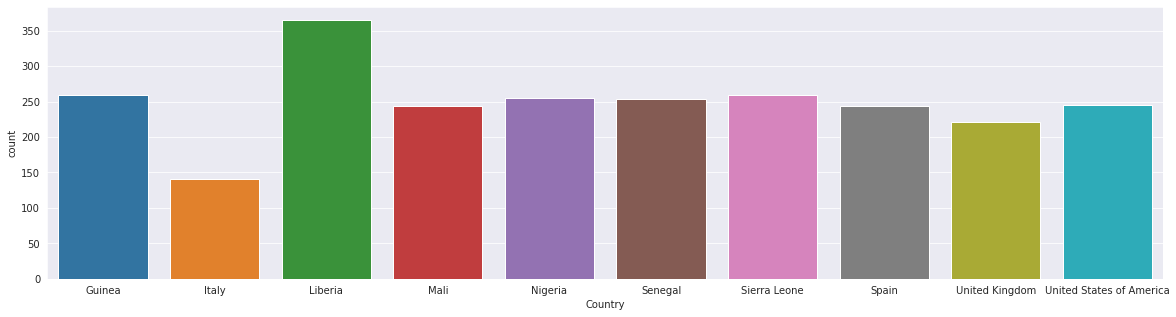

In [31]:
#plotting barcharts of countries count
plt.figure(figsize=(20,5))
sns.countplot(ebola_df['Country'])

*from the countplot, liberia has the highest count while italy has the lowest count*

In [32]:
ebola_df.groupby(['Country']).sum().sort_values(by='no of confirmed deaths', ascending=False)

,no of confirmed cases,no of confirmed deaths
Country,,
Liberia,2459122.0,1099833.0
Sierra Leone,3003428.0,888834.0
Guinea,854118.0,563069.0
Nigeria,5105.0,2039.0
Mali,1865.0,1427.0
United States of America,967.0,242.0
Italy,141.0,0.0
Senegal,258.0,0.0
Spain,243.0,0.0


*Sierra leone has the highest number of confirmed cases while Liberia has the highest number of deaths*

### 5) Bivariate Analysis

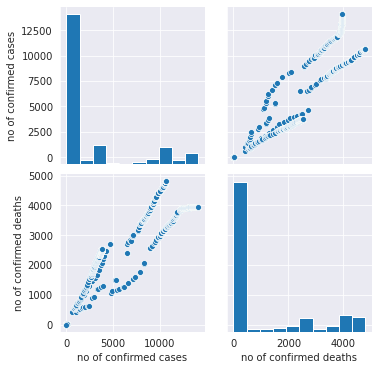

In [33]:
#pairplots
sns.pairplot(data=ebola_df)

*the almost form a normal distribution*

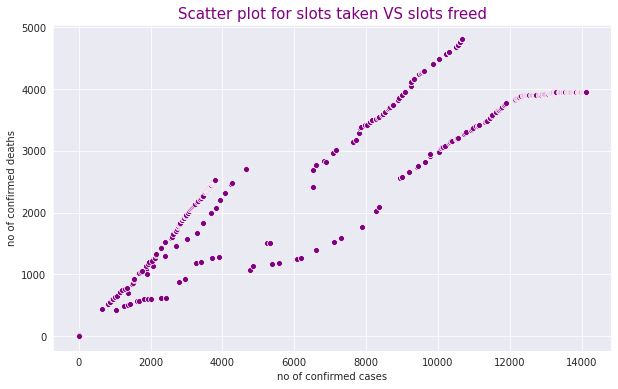

In [ ]:
#plotting scatter plot of deaths and cases
#
fig = plt.figure(figsize = (10, 6))
sns.scatterplot(ebola_df['no of confirmed cases'], ebola_df['no of confirmed deaths'], color = 'purple')
plt.title('Scatter plot for slots taken VS slots freed', color = 'purple', fontdict={'size': 15})
plt.show()

*the graph shows a correlation between death ans cases*

In [34]:
#correlation of cases and deaths confirmed
#pandas corr() function is used to find the correlation

ebola_df.corr()


,no of confirmed cases,no of confirmed deaths
no of confirmed cases,1.0000,0.9558
no of confirmed deaths,0.9558,1.0000


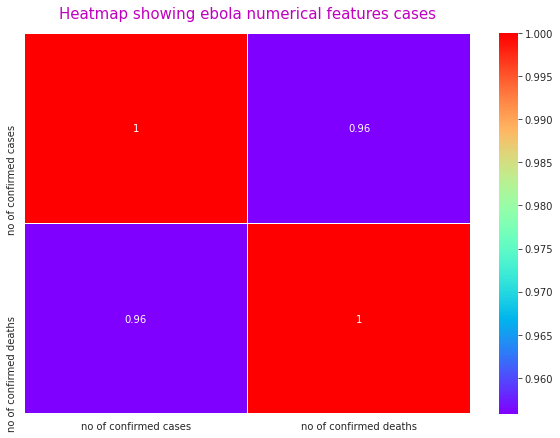

In [ ]:
#heatmap correlation

plt.figure(figsize= (10,7))
sns.heatmap(ebola_df.corr(), annot=True, cmap='rainbow', linewidths=0.1, vmax=1.0, linecolor='white', square=False)
plt.title('Heatmap showing ebola numerical features cases', color='m', pad=15, fontdict={'size': 15})
plt.show()

*there is a high correlation btwn cases and deaths. their values are greater than 0.8.the no. of deaths is dependent on the number of cases*

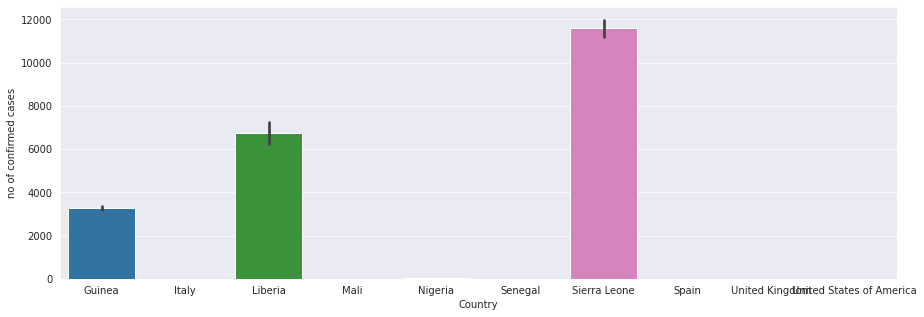

In [37]:
#plotting graphs of cases and deaths in diff countries

plt.figure(figsize=(15,5))
sns.barplot(x='Country', y='no of confirmed cases', data=ebola_df)

*sierra leone has the highest number of confimrd cases*

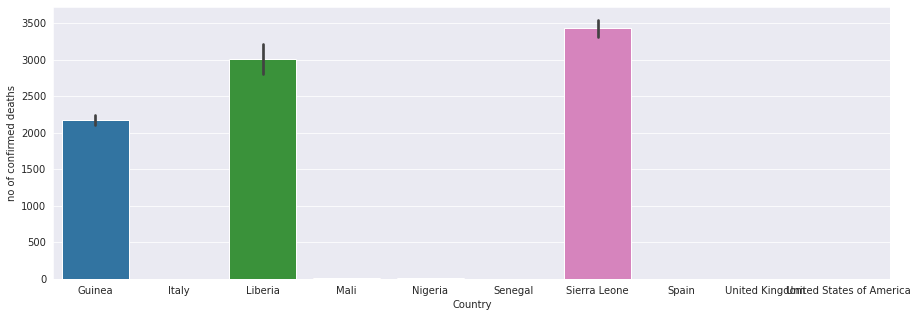

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x='Country', y='no of confirmed deaths', data=ebola_df)

*sierra leone recorded the highest number of deaths*

### 6) Multivariate Analysis

In [42]:
#getting the number of recoveries
#create a recovery column
ebola_df['no of recoveries'] = ebola_df['no of confirmed cases'] - ebola_df['no of confirmed deaths']
ebola_df.head(10)

,Country,Date,no of confirmed cases,no of confirmed deaths,no of recoveries
0,Guinea,2014-08-29,648.0,430.0,218.0
1,Nigeria,2014-08-29,19.0,7.0,12.0
2,Sierra Leone,2014-08-29,1026.0,422.0,604.0
3,Liberia,2014-08-29,1378.0,694.0,684.0
4,Sierra Leone,2014-09-05,1261.0,491.0,770.0
5,Nigeria,2014-09-05,22.0,8.0,14.0
6,Liberia,2014-09-05,1871.0,1089.0,782.0
7,Guinea,2014-09-05,812.0,517.0,295.0
8,Senegal,2014-09-05,1.0,0.0,1.0
9,Senegal,2014-09-08,3.0,0.0,3.0


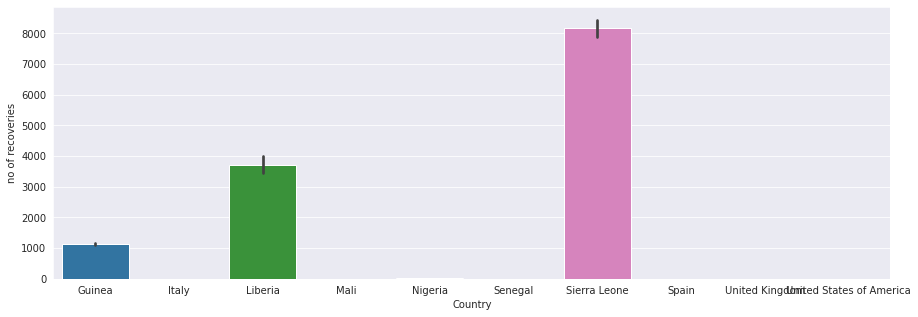

In [43]:
#visualize country with highest recovery

plt.figure(figsize=(15,5))
sns.barplot(x='Country', y='no of recoveries', data=ebola_df)

### 7) Hypothesis Testing

**Hypothesis 1**

The average number of deaths in sierra leonne is the same as that in Liberia.

Ho: mu1 = mu2

H1: mu1 != mu2

In [ ]:
#selecting relevant data
#for liberia
lib_df=ebola_df[ebola_df['Country'] == 'Liberia']
lib_df.head()

,Country,Date,no of confirmed cases,no of confirmed deaths
3,Liberia,2014-08-29,1378.0,694.0
6,Liberia,2014-09-05,1871.0,1089.0
12,Liberia,2014-09-08,2046.0,1224.0
17,Liberia,2014-09-12,2081.0,1137.0
23,Liberia,2014-09-16,2407.0,1296.0


In [ ]:
lib_df['no of confirmed deaths']

3        694.0
6       1089.0
12      1224.0
17      1137.0
23      1296.0
         ...  
2465    4806.0
2466       3.0
2479       3.0
2480    4806.0
2482       4.0
Name: no of confirmed deaths, Length: 365, dtype: float64

In [ ]:
#pop mean of deaths in liberia
lib_df['no of confirmed deaths'].mean()

3013.241095890411

In [ ]:
libdeaths=lib_df['no of confirmed deaths'].values
libdeaths

In [ ]:
#for sierra leone
sierra_df=ebola_df[ebola_df['Country'] == 'Sierra Leone']
sierra_df.head()

,Country,Date,no of confirmed cases,no of confirmed deaths
2,Sierra Leone,2014-08-29,1026.0,422.0
4,Sierra Leone,2014-09-05,1261.0,491.0
11,Sierra Leone,2014-09-08,1361.0,509.0
15,Sierra Leone,2014-09-12,1424.0,524.0
20,Sierra Leone,2014-09-16,1620.0,562.0


In [ ]:
#avg no of deaths in sierra
sierra_df['no of confirmed deaths'].mean()

3431.7915057915056

In [ ]:
sierradeaths=sierra_df['no of confirmed cases'].values

In [ ]:
#sampling
#choosing a sample of 50 from liberia

samplib=libdeaths[np.argsort(np.random.random_sample(len(lib_df)))[:50]]

In [ ]:
#choosing a sample of 50 from sierra
sampsierra=sierradeaths[np.argsort(np.random.random_sample(len(sierra_df)))[:50]]
sampsierra

array([13135., 12267., 11155., 13262., 13465., 13928., 14122., 12313.,
       12827.,  6190.,  2950., 12962., 12523.,  4862., 10934., 11619.,
       14122., 10030., 12440., 13470., 12362., 12426., 11517., 11696.,
       11103., 13387., 14122., 14122., 13290., 14122., 11794., 12816.,
       12932.,  9780., 14001., 11301., 13489., 11497., 11677.,  9772.,
       10561., 11103.,  6599.,  9780.,  5235., 13582., 13982., 13402.,
        1361., 12223.])

In [ ]:
#calculating pop variance of liberia and sierra leone

varlib=np.var(lib_df)
varsierra=np.var(sierra_df)

samp_lib_mean=np.mean(samplib)
samp_sierra_mean=np.mean(sampsierra)

print(samp_lib_mean)
print(samp_sierra_mean)

2862.24
11472.2


In [ ]:
#calculate ztest

import math
(samp_lib_mean-samp_sierra_mean)-(0)/(math.sqrt((varlib/50)+(varsierra/50)))
# (meanOfSampF-meanOfSampM) - (0) / (math.sqrt((varPopF/50)+(varPopM/50)))

### 8) Modelling

***Linear regression***

In [65]:
#identifying the target and the explanatory variables

X = ebola_df['no of confirmed cases'].values.reshape(-1,1)  #independent
y = ebola_df['no of confirmed deaths'].values #dependent

In [66]:
#splitting the data into training and test sets
#use 20% of the data to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
#creating a regressor object
regressor= LinearRegression()
regressor.fit(X_train, y_train)

#intercept
print(regressor.intercept_)

#coefficient
print(regressor.coef_)  #slope

117.66719956161057
[0.35585098]


In [71]:
#assess accuracy
#comapring the actual and the predicted
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,496.000000,496.000000
mean,1051.441532,1025.158213
std,1683.888049,1568.705258
min,0.000000,118.023051
25%,0.000000,118.023051
50%,6.000000,120.514007
75%,2444.500000,1440.899050
max,4806.000000,5142.994669


In [100]:
y_pred = regressor.predict(X_test)

import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc_linear_reg=round(r2_score(y_test, y_pred)*100,2)
acc_linear_reg

Mean Absolute Error: 333.7441281472331
Mean Squared Error: 232261.52417163004
Root Mean Squared Error: 481.93518669176876


91.79

*our model accuracy is at 92%.our model is perfoming quite well*

**ElasticNet regression**

In [102]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
y_pred= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,y_pred)))
print(r2_score(y_train,y_pred))

y_pred= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
acc_elastic_net=round(r2_score(y_test, y_pred)*100,2)
acc_elastic_net

488.7740747447543
0.9123631063257337
481.93518683490254


91.79

*92% accuracy*

***Decision Tree***

In [86]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

97.83

*98% accuracy*

***Random forest***

In [88]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100,2)
acc_random_forest

97.83

*98% accuracy*

*Which is the best model*

In [103]:
results = pd.DataFrame({
    'Model':['ElasticNet Regression', 'Linear Regression', 
              'Random Forest','Decision Tree'],
      'Score':[acc_linear_reg, acc_elastic_net, acc_random_forest,acc_decision_tree]})

results_df = results.sort_values(by='Score', ascending=False)
results_df= results_df.set_index('Score')
results_df

,Model
Score,
97.83,Random Forest
97.83,Decision Tree
91.79,ElasticNet Regression
91.79,Linear Regression


*out of all the models, random forest came first*